In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from PIL import Image
import requests
from io import BytesIO
import plotly.express as px
import plotly.graph_objects as go
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [2]:
df = pd.read_csv("202001-rma-csv-collection.csv")

In [3]:
df.head()

,objectInventoryNumber,objectPersistentIdentifier,objectTitle[1],objectType[1],objectCreator[1],objectCreationDate[1],objectImage
0,-1RP-F-2001-7-1480,http://hdl.handle.net/10934/RM0001.COLLECT.704235,Les artistes belges,boek,NaN,NaN,NaN
1,2RP-F-2001-7-1020-41,http://hdl.handle.net/10934/RM0001.COLLECT.678849,Portret van Prescott H. Butler,fotomechanische afdruk,anonymous,1869,NaN
2,AK-BR-324,http://hdl.handle.net/10934/RM0001.COLLECT.321537,"Klokvormige kom met bleu poudré, draken en parels",kom,anonymous,1800,https://lh3.googleusercontent.com/S3wgRasrmmAk...
3,AK-BR-325,http://hdl.handle.net/10934/RM0001.COLLECT.3866,Eivormige vaas met een rood glazuur,vaas,anonymous,1800,https://lh3.googleusercontent.com/kc2u8EkKqRbD...
4,AK-BR-367,http://hdl.handle.net/10934/RM0001.collect.163127,Ronde doos met goudlak,doos,NaN,1775,https://lh3.ggpht.com/JNbJGaB7EIJqolKXACtFVcYZ...


In [4]:
# Display basic information about the dataset
print(df.info())

# Display basic statistics for numerical columns
print(df.describe())

art_counts = df['objectType[1]'].value_counts()
art_counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667894 entries, 0 to 667893
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   objectInventoryNumber       667894 non-null  object
 1   objectPersistentIdentifier  667894 non-null  object
 2   objectTitle[1]              667852 non-null  object
 3   objectType[1]               667836 non-null  object
 4   objectCreator[1]            654497 non-null  object
 5   objectCreationDate[1]       640555 non-null  object
 6   objectImage                 392639 non-null  object
dtypes: object(7)
memory usage: 35.7+ MB
None
       objectInventoryNumber  \
count                 667894   
unique                667894   
top       -1RP-F-2001-7-1480   
freq                       1   

                               objectPersistentIdentifier  \
count                                              667894   
unique                                          

prent                     313905
foto                      105227
tekening                   45248
schetsboekblad             28978
fotomechanische afdruk     25401
                           ...  
offerbus                       1
zakboekje                      1
pillendoosje                   1
stemvork                       1
bodem (potscherven)            1
Name: objectType[1], Length: 2576, dtype: int64

In [5]:
# Check for missing values
print(df.isnull().sum())

objectInventoryNumber              0
objectPersistentIdentifier         0
objectTitle[1]                    42
objectType[1]                     58
objectCreator[1]               13397
objectCreationDate[1]          27339
objectImage                   275255
dtype: int64


In [6]:
df_exnull = df.dropna()
df_exnull.head()

#374519 rows now (667894 in original dataset with null values) - still "anonymous" and "unknown" values for objectCreatpr

,objectInventoryNumber,objectPersistentIdentifier,objectTitle[1],objectType[1],objectCreator[1],objectCreationDate[1],objectImage
2,AK-BR-324,http://hdl.handle.net/10934/RM0001.COLLECT.321537,"Klokvormige kom met bleu poudré, draken en parels",kom,anonymous,1800,https://lh3.googleusercontent.com/S3wgRasrmmAk...
3,AK-BR-325,http://hdl.handle.net/10934/RM0001.COLLECT.3866,Eivormige vaas met een rood glazuur,vaas,anonymous,1800,https://lh3.googleusercontent.com/kc2u8EkKqRbD...
5,AK-BR-972,http://hdl.handle.net/10934/RM0001.COLLECT.328281,Kom met draken boven golven,spoelkom,anonymous,1700,https://lh3.googleusercontent.com/OCREg8JrIikK...
6,AK-BR-BOU-7,http://hdl.handle.net/10934/RM0001.COLLECT.312,Suzuribako met inktsteen en waterdruppelaar,suzuribako,Suisen,1700,https://lh5.ggpht.com/4aeb-Nu_VC6szPFUV_y-IZLo...
8,AK-BR-FLA-2,http://hdl.handle.net/10934/RM0001.COLLECT.338,Graffiguur in de vorm van een hurkende dame,beeld,anonymous,220,https://lh3.googleusercontent.com/DdiZBimiUqhz...


In [7]:
# Drop rows with 'unknown' or 'anonymous' in the 'objectCreator[1]' column
df_eda = df_exnull[~df_exnull['objectCreator[1]'].isin(['unknown', 'anonymous'])]

# Reset the index after dropping rows
df_eda.reset_index(drop=True, inplace=True)

df_eda.head()

,objectInventoryNumber,objectPersistentIdentifier,objectTitle[1],objectType[1],objectCreator[1],objectCreationDate[1],objectImage
0,AK-BR-BOU-7,http://hdl.handle.net/10934/RM0001.COLLECT.312,Suzuribako met inktsteen en waterdruppelaar,suzuribako,Suisen,1700,https://lh5.ggpht.com/4aeb-Nu_VC6szPFUV_y-IZLo...
1,AK-BR-GUE-1,http://hdl.handle.net/10934/RM0001.COLLECT.344,Album,album,Kano Yasunobu,1700,https://lh3.googleusercontent.com/kAd541WLGdXJ...
2,AK-C-2012-1,http://hdl.handle.net/10934/RM0001.COLLECT.507705,Keizerlijke geschenkdoos,doos,lacquerer,1920,https://lh5.ggpht.com/kILCTBZWjZUxM2_LC5nMX3GZ...
3,AK-C-2012-13,http://hdl.handle.net/10934/RM0001.COLLECT.507764,Schrijfcassette van lakwerk,schrijfcassette,lacquerer,1889,https://lh3.ggpht.com/MkeWxVytDZ_9drflnNByHY_u...
4,AK-C-2012-14,http://hdl.handle.net/10934/RM0001.COLLECT.507765,Schrijfcassette van lakwerk,schrijfcassette,lacquerer,1910,https://lh3.googleusercontent.com/K5_h_YiryP7z...


## Proportion Paintings vs Other Artworks

/var/folders/2d/vrxk2jnd1z36wv_sfs69c0b00000gn/T/ipykernel_60953/3568699897.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eda['ArtCategory'] = df_eda['objectType[1]'].apply(lambda x: 'Paintings' if x == 'schilderij' else 'Other')


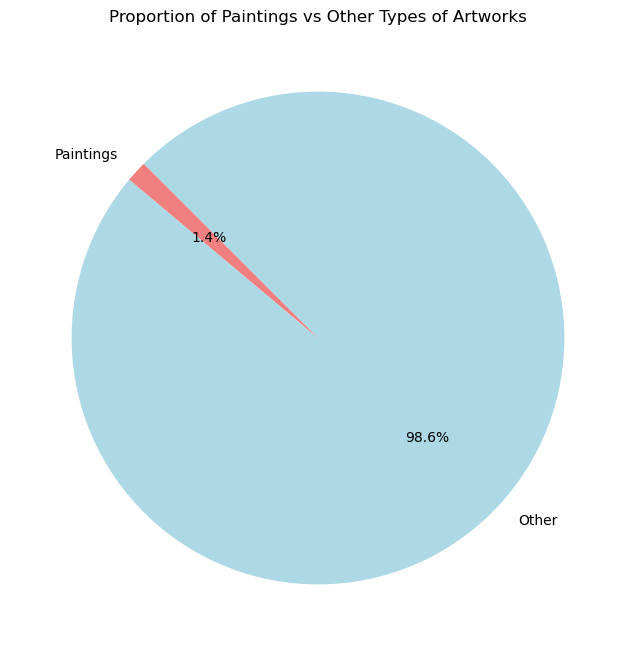

In [8]:
df_eda['ArtCategory'] = df_eda['objectType[1]'].apply(lambda x: 'Paintings' if x == 'schilderij' else 'Other')

# Count the occurrences of each art category
art_category_counts2 = df_eda['ArtCategory'].value_counts()
art_category_counts2

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(art_category_counts2, labels=art_category_counts2.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral'])
plt.title('Proportion of Paintings vs Other Types of Artworks')
plt.show()

In [9]:
art_category_counts2

Other        279716
Paintings      3926
Name: ArtCategory, dtype: int64

So we have 3926 paintings which can be used for our project.

## Creating the Dataset with Only Paintings

In [10]:
df_eda_paintings = df_eda[df_eda['objectType[1]'] == 'schilderij']

df_eda_paintings

,objectInventoryNumber,objectPersistentIdentifier,objectTitle[1],objectType[1],objectCreator[1],objectCreationDate[1],objectImage,ArtCategory
13891,BK-2011-38,http://hdl.handle.net/10934/RM0001.COLLECT.506083,Behangselschildering met een Hollands landscha...,schilderij,"Andriessen, Jurriaan",1776,https://lh6.ggpht.com/atPdLx1MEE2to5Lo95ggKIKG...,Paintings
13892,BK-2011-39,http://hdl.handle.net/10934/RM0001.COLLECT.506098,Behangselschildering van een Hollands landscha...,schilderij,"Andriessen, Jurriaan",1776,https://lh4.ggpht.com/zVe_ydA4NV_SxNAFWnuMX7kX...,Paintings
13894,BK-2011-40,http://hdl.handle.net/10934/RM0001.COLLECT.506099,Behangselschildering,schilderij,"Andriessen, Jurriaan",1776,https://lh3.googleusercontent.com/qwgQbyU9BiUj...,Paintings
13895,BK-2011-41,http://hdl.handle.net/10934/RM0001.COLLECT.506101,Behangselschildering van een Hollands landscha...,schilderij,"Andriessen, Jurriaan",1776,https://lh3.googleusercontent.com/kC88iCgdrtWx...,Paintings
13896,BK-2011-42,http://hdl.handle.net/10934/RM0001.COLLECT.506104,Behangselschildering van een Hollands landscha...,schilderij,"Andriessen, Jurriaan",1776,https://lh3.googleusercontent.com/c-k-h3TguAwb...,Paintings
...,...,...,...,...,...,...,...,...
283635,SK-C-97,http://hdl.handle.net/10934/RM0001.COLLECT.5990,Italiaans landschap,schilderij,"Berchem, Nicolaes Pietersz.",1656,https://lh3.googleusercontent.com/HlLpOCKLDUaZ...,Paintings
283636,SK-C-98,http://hdl.handle.net/10934/RM0001.COLLECT.5987,Italiaans landschap,schilderij,"Berchem, Nicolaes Pietersz.",1655,https://lh3.googleusercontent.com/69GAOuQMXG7x...,Paintings
283637,SK-C-983,http://hdl.handle.net/10934/RM0001.COLLECT.8799,De trommelaarster,schilderij,"Israels, Isaac",1890,https://lh3.googleusercontent.com/Uy65pxt7CGKK...,Paintings
283640,SK-NM-16709-1,http://hdl.handle.net/10934/RM0001.COLLECT.532868,Ovaal middenstuk van een plafondschildering ve...,schilderij,"Nijmegen, Elias van",1695,https://lh3.googleusercontent.com/y4o4n40be6mg...,Paintings


In [14]:
# Amount of unique artists in the dataset:
unique_artist_names = df_eda_paintings['objectCreator[1]'].nunique()

print("Number of unique artist names:", unique_artist_names)

Number of unique artist names: 1353


In [15]:
# Filtering dataset on the by our chosen artists: Rembrandt, Steen, Vermeer, Avercamp, van Gogh and Hooch:
desired_artists = ["Rijn, Rembrandt van", "Hals, Frans", "Saenredam, Pieter Jansz.", "Avercamp, Hendrick", "Hooch, Pieter de"]

# Assuming 'objectCreator[1]' contains the artist names
df_eda_paintings_topartists = df_eda_paintings[df_eda_paintings['objectCreator[1]'].isin(desired_artists)]

# Display the filtered DataFrame
df_eda_paintings_topartists

,objectInventoryNumber,objectPersistentIdentifier,objectTitle[1],objectType[1],objectCreator[1],objectCreationDate[1],objectImage,ArtCategory
279487,SK-A-1189,http://hdl.handle.net/10934/RM0001.COLLECT.5353,De westelijke traveeën van de zuidelijke beuk ...,schilderij,"Saenredam, Pieter Jansz.",1640,https://lh3.googleusercontent.com/pKvEe5hqfzdB...,Paintings
279530,SK-A-1246,http://hdl.handle.net/10934/RM0001.COLLECT.8606,Portret van een man,schilderij,"Hals, Frans",1635,https://lh3.googleusercontent.com/uIAAKcrSCN4g...,Paintings
279531,SK-A-1247,http://hdl.handle.net/10934/RM0001.COLLECT.8607,Portret van een vrouw,schilderij,"Hals, Frans",1635,https://lh3.googleusercontent.com/vglBZxUZILuW...,Paintings
279595,SK-A-1320,http://hdl.handle.net/10934/RM0001.COLLECT.5852,Schaatsenrijden in een dorp,schilderij,"Avercamp, Hendrick",1610,https://lh3.googleusercontent.com/Slr3HzD7S-0x...,Paintings
279605,SK-A-133,http://hdl.handle.net/10934/RM0001.COLLECT.8608,"Portret van een stel in een landschap, waarsch...",schilderij,"Hals, Frans",1622,https://lh3.googleusercontent.com/WJyYFvVf8ouR...,Paintings
279611,SK-A-134,http://hdl.handle.net/10934/RM0001.COLLECT.8615,De luitspeler,schilderij,"Hals, Frans",1623,https://lh3.ggpht.com/L9XrhFxARvr1OQ2VeO8j1XRN...,Paintings
279618,SK-A-135,http://hdl.handle.net/10934/RM0001.COLLECT.8609,"Een schutter die een berkenmeier vasthoudt, be...",schilderij,"Hals, Frans",1628,https://lh3.googleusercontent.com/5aw-i_9ekbJ4...,Paintings
279974,SK-A-1718,http://hdl.handle.net/10934/RM0001.COLLECT.5853,Winterlandschap met schaatsers,schilderij,"Avercamp, Hendrick",1608,https://lh3.googleusercontent.com/LW9vbQVQVGCg...,Paintings
280060,SK-A-181,http://hdl.handle.net/10934/RM0001.COLLECT.8767,Zelfportret?,schilderij,"Hooch, Pieter de",1648,https://lh3.googleusercontent.com/WuiP4u66rExD...,Paintings
280065,SK-A-182,http://hdl.handle.net/10934/RM0001.COLLECT.8770,Een vrouw met een kind in een kelderkamer,schilderij,"Hooch, Pieter de",1656,https://lh3.googleusercontent.com/5HyCvI9V8cj4...,Paintings


## Proportion of Paintings of Our Chosen Top Artists

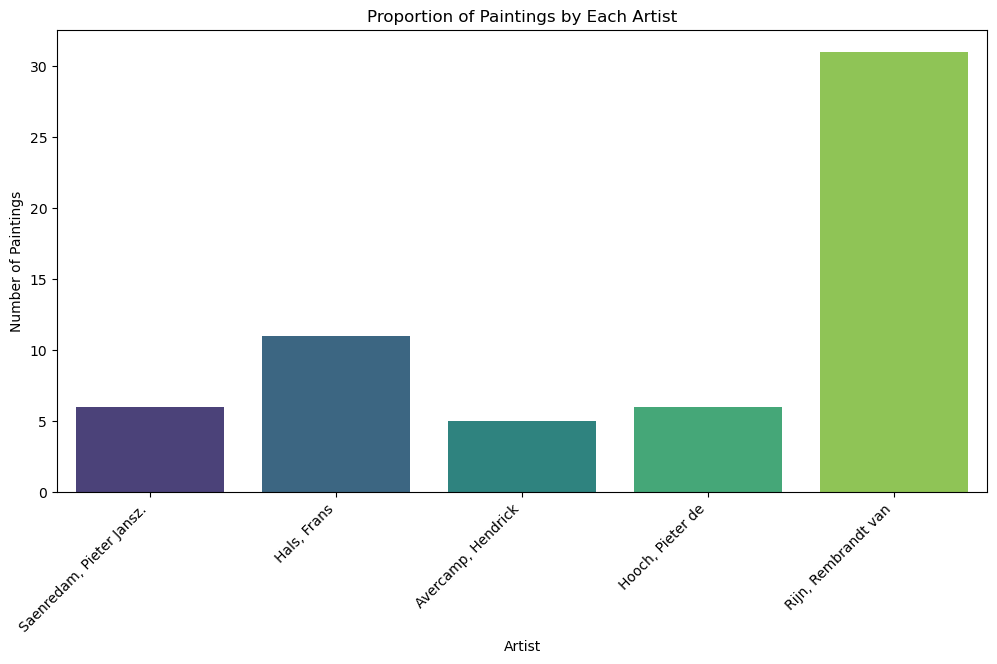

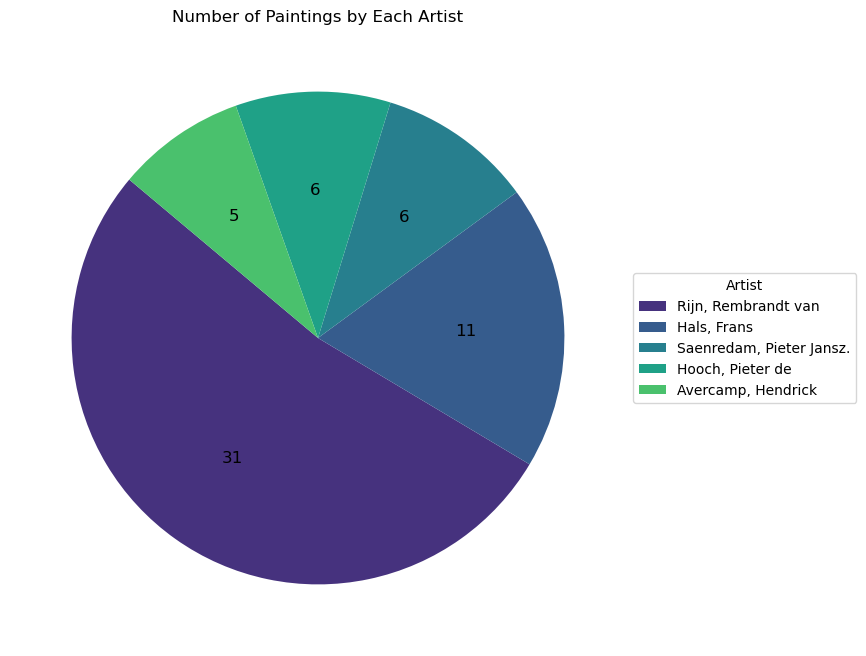

In [16]:
# Proportion of paintings by each Artist:
plt.figure(figsize=(12, 6))
sns.countplot(x='objectCreator[1]', data=df_eda_paintings_topartists, palette='viridis')
plt.title('Proportion of Paintings by Each Artist')
plt.xlabel('Artist')
plt.ylabel('Number of Paintings')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

artist_counts = df_eda_paintings_topartists['objectCreator[1]'].value_counts()
plt.figure(figsize=(12, 8))
# Plotting the pie chart
wedges, texts, autotexts = plt.pie(artist_counts, autopct=lambda p: '{:.0f}'.format(p * sum(artist_counts) / 100), startangle=140, colors=sns.color_palette('viridis'))
# Adding exact numbers as text annotations on each wedge
for text, autotext in zip(texts, autotexts):
    text.set_size(12)
    autotext.set_size(12)
plt.gca().set_aspect('equal')
plt.title('Number of Paintings by Each Artist')
plt.legend(wedges, artist_counts.index, title='Artist', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

In [17]:
# Example: Display the image of each artwork based on index:
response = requests.get(df_eda_paintings_topartists['objectImage'][279974])
img = Image.open(BytesIO(response.content))
img.show()

In [18]:
duplicates = df_eda_paintings_topartists.duplicated()

# Print the number of duplicate entries
print("Number of duplicate entries:", duplicates.sum())

Number of duplicate entries: 0


## Timeline of Artists' Creations


Possible question here for our interface: "In which century was the painter of this artwork active?"

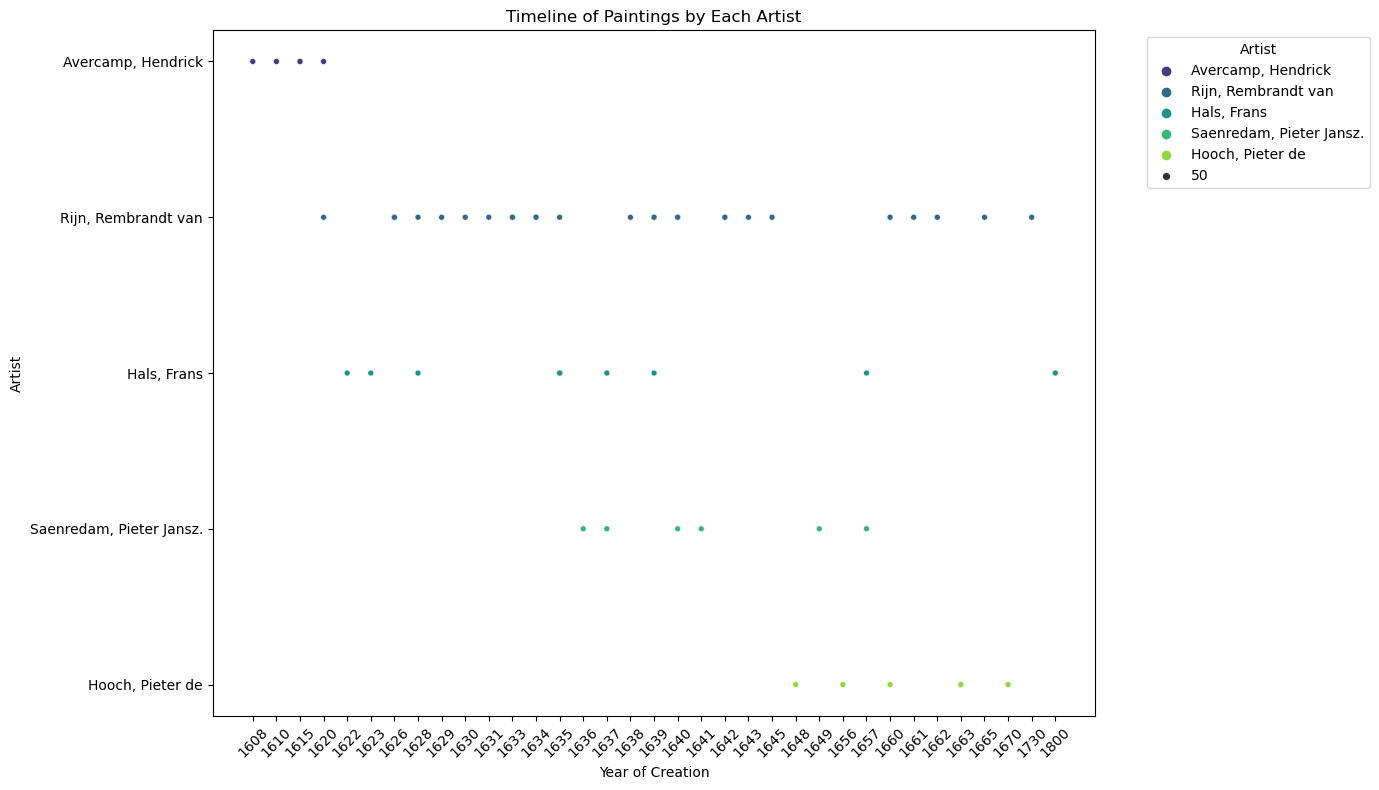

In [19]:
# Plotting timeline scatter plot
# Sort the DataFrame by 'objectCreationDate[1]'
df_eda_paintings_topartists = df_eda_paintings_topartists.sort_values(by='objectCreationDate[1]')

# Plotting the timeline scatter plot with larger data points
plt.figure(figsize=(14, 8))
sns.scatterplot(x='objectCreationDate[1]', y='objectCreator[1]', hue='objectCreator[1]', palette='viridis', data=df_eda_paintings_topartists, size=50)  # Adjust the size as needed

# Adding images as annotations
for index, row in df_eda_paintings_topartists.iterrows():
    plt.annotate("", xy=(row['objectCreationDate[1]'], row['objectCreator[1]']), xytext=(0, 0), textcoords='offset points', arrowprops=dict(facecolor='black', arrowstyle='wedge,tail_width=0.7', alpha=0.5))

# Adjusting the appearance of the plot
plt.title('Timeline of Paintings by Each Artist')
plt.xlabel('Year of Creation')
plt.ylabel('Artist')
plt.xticks(rotation=45)
plt.legend(title='Artist', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

In [20]:
# Create a bar plot for the number of artworks per year
#plt.figure(figsize=(15, 6))
#sns.countplot(x='objectCreationDate[1]', data=df_eda_paintings_topartists, palette='viridis')
#plt.title('Number of Artworks Created Each Year')
#plt.xlabel('Year of Creation')
#plt.ylabel('Number of Artworks')
#plt.xticks(rotation=45)
#plt.show()

## Distribution of the Paintings by Top Artists Over the Years

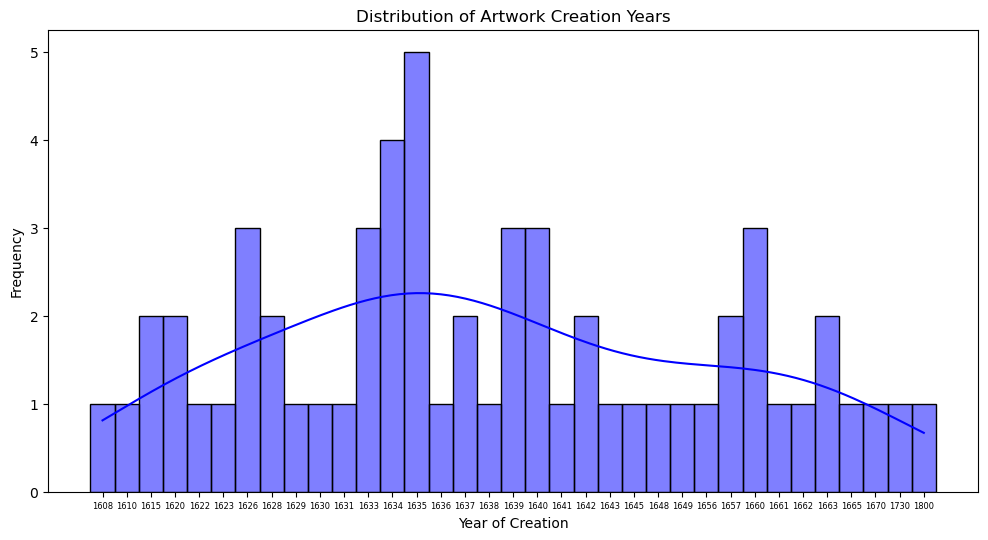

In [21]:
# Create a distribution plot
plt.figure(figsize=(12, 6))
ax = sns.histplot(df_eda_paintings_topartists['objectCreationDate[1]'], bins=30, kde=True, color='blue')
plt.title('Distribution of Artwork Creation Years')
plt.xlabel('Year of Creation')
plt.ylabel('Frequency')

ax.tick_params(axis='x', labelsize=6)

plt.show()

Remarkable in the above visualization of the distribution; a peak of paintings in 1635.